# Chapter 10: Variation and the Process Principle
For additional context see Chapter 10 of [The Virus of Variation](https://www.brokenquality.com/book). Questions? Email James.Lehner@gmail.com or QualityIsBroken@gmail.com.

In [1]:
# Import libraries
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
import seaborn as sns
import pandas as pd
from process_improvement import xmr_charts as xmr
from process_improvement import comparison_charts as cc
from process_improvement import network_analysis as na

# For Figures 10.6 and 10.7
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

## Get the data

The dataset used in this chapter is called:

`shewharts-resistance-measurements.csv`

The dataset can be found at https://github.com/jimlehner/the-virus-of-variation/tree/main/data.

In [2]:
# Dataset url
dataset_url = r'https://raw.githubusercontent.com/jimlehner/the-virus-of-variation/refs/heads/main/data/shewharts-resistance-measurements.csv'

# Get data
def get_data() -> pd.DataFrame:
    return pd.read_csv(dataset_url)

# Get data
resistance_df = get_data()

# Make 'Year' column dtype string
resistance_df['Value'] = resistance_df['Value'].astype('string')

# Drop 'Units' column
resistance_df = resistance_df.drop('Units', axis=1)

# Show df
resistance_df.head()

,Stage,Value,Resistance
0,Initial,1,5045
1,Initial,2,4350
2,Initial,3,4350
3,Initial,4,3975
4,Initial,5,4290


## Group data by stage

In [3]:
# Get groups
grouped_df = resistance_df.groupby('Stage')

# Create dataframe of initial stage
initial_df = grouped_df.get_group('Initial').copy()

# Calculate the moving range
initial_df['Moving Range'] = abs(initial_df['Resistance'].diff())

# Create dataframe of only Dublin General data
additional_df = grouped_df.get_group('Additional').reset_index(drop=True)

## Figure 10.2: Square loss function and the engineering concept of specifications

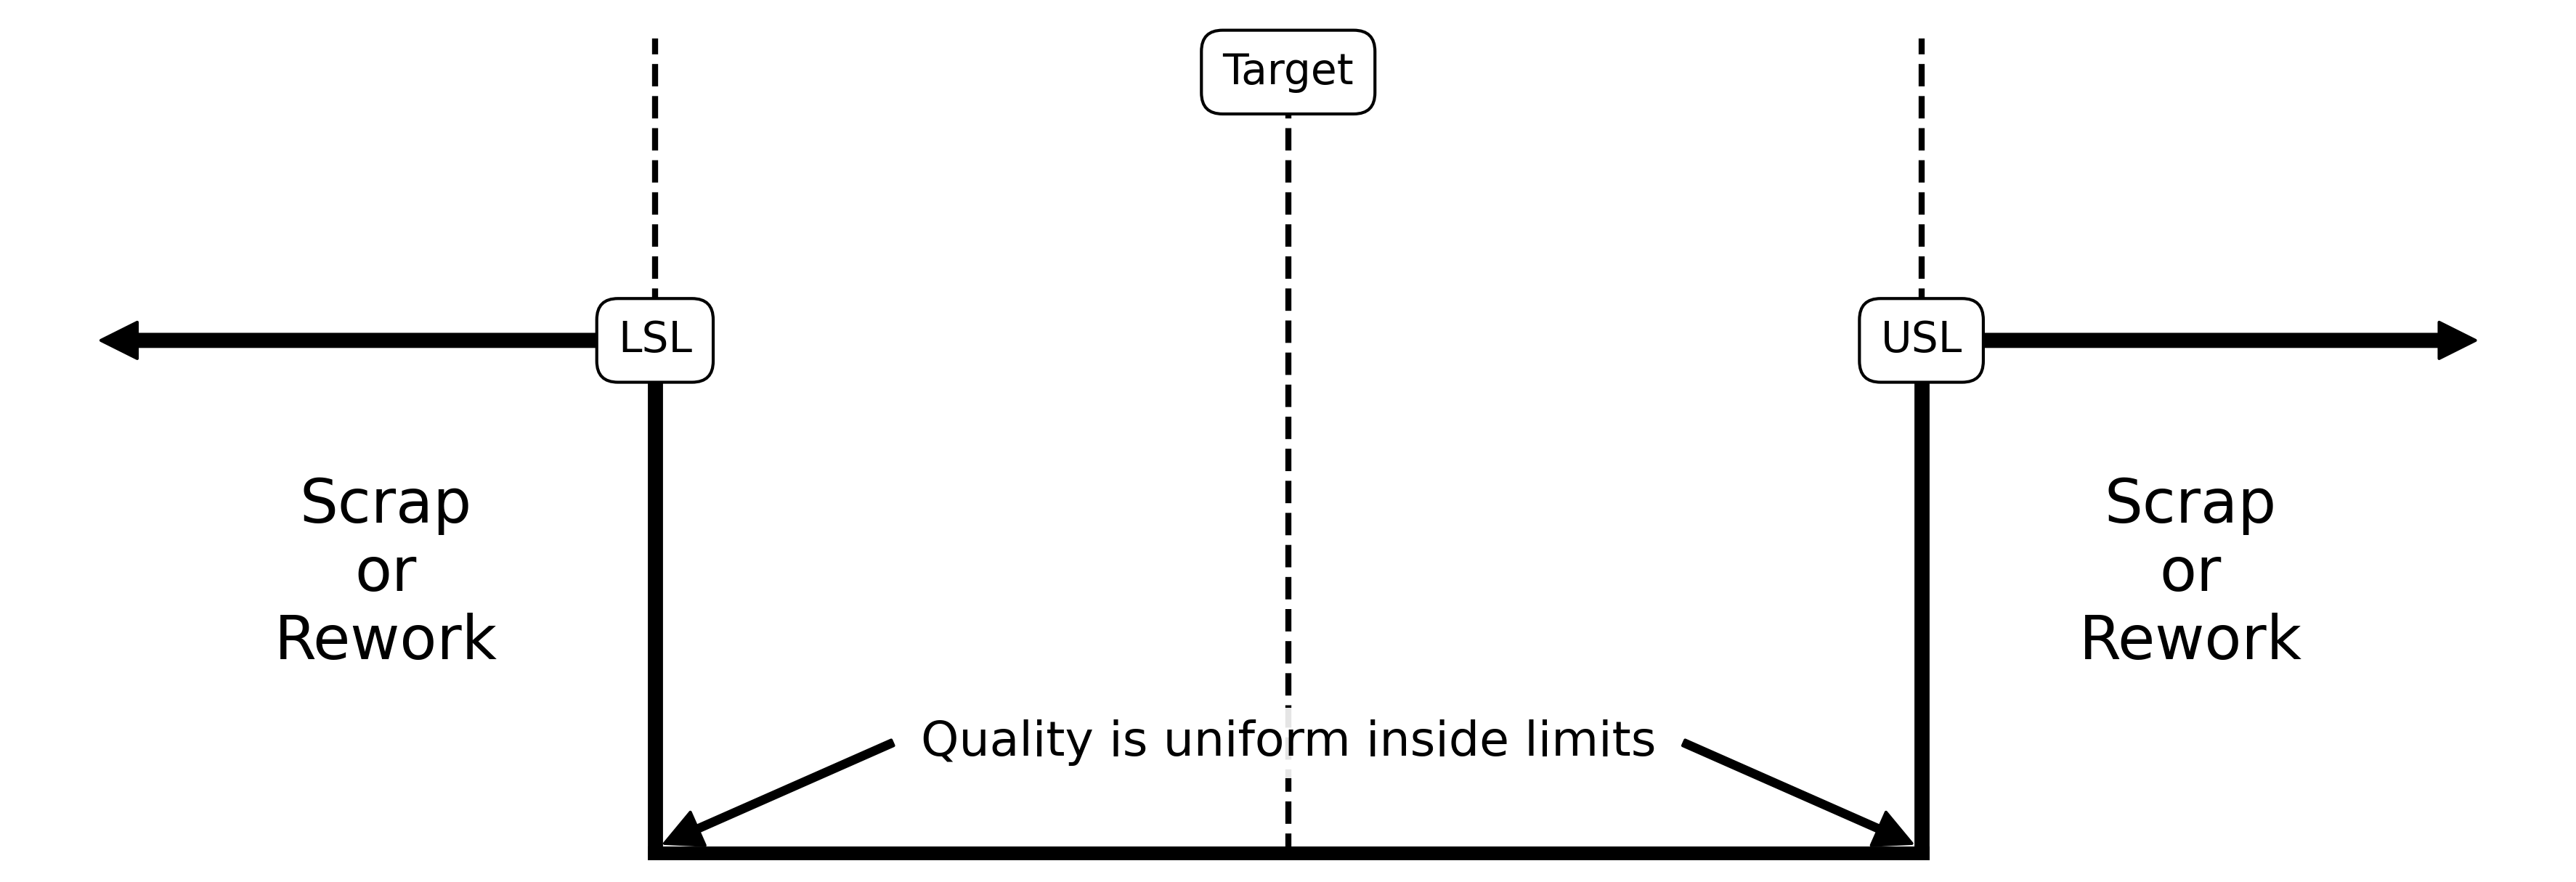

In [4]:
# Create figure
fig, ax = plt.subplots(figsize=(15, 5), dpi=300)

# Specification limits (LSL, USL, Target)
spec_limits = [-2, 0, 2]
for x in spec_limits:
    ax.axvline(x, ls='--', lw=2, color='black', ymin=0.005, ymax=0.9 if x == 0 else 0.98)

# Outside limit horizontal arrows
for x_start, x_end in [(-3.75, -2), (3.75, 2)]:
    ax.annotate('', xy=(x_start, 0.31), xytext=(x_end, 0.31),
                arrowprops=dict(edgecolor='black', facecolor='black'))

# Text labels for limits
labels = { -2: "LSL", 2: "USL", 0: "Target"}
for x, label in labels.items():
    ax.text(x, 0.31 if x else 0.47, label, ha='center', va='center', fontsize=14,
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=0.5))

# Central quality message
ax.text(0, 0.07, 'Quality is uniform inside limits',
        ha='center', va='center', fontsize=16,
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.9))

# Arrows pointing inside limits
for x_start, x_end in [(-1.97, -1.25), (1.97, 1.25)]:
    ax.annotate('', xy=(x_start, 0.01), xytext=(x_end, 0.07),
                arrowprops=dict(edgecolor='black', facecolor='black', width=2))

# Thick boundary lines at LSL and USL
for x in [-2, 2]:
    ax.axvline(x, ls='-', lw=5, color='black', ymax=0.62)

# Horizontal connect spec limits
ax.axhline(0.004, ls='-', lw=5, color='black', xmin=0.25, xmax=0.75)

# 'Scrap' and 'Rework' labels
ax.text(-2.85, 0.12, 'Scrap\nor\nRework', ha='center', fontsize=20)
ax.text(2.85, 0.12, 'Scrap\nor\nRework', ha='center', fontsize=20)

# Remove top and right spines for cleaner look
sns.despine()
ax.spines[['left', 'bottom']].set_alpha(0.5)

# Set axis limits
ax.set_xlim([-4, 4])
ax.set_ylim([0, 0.5])

# Remove axes
ax.set_axis_off()

# Show plot
plt.show()

## Figure 10.5: The Taguchi loss function

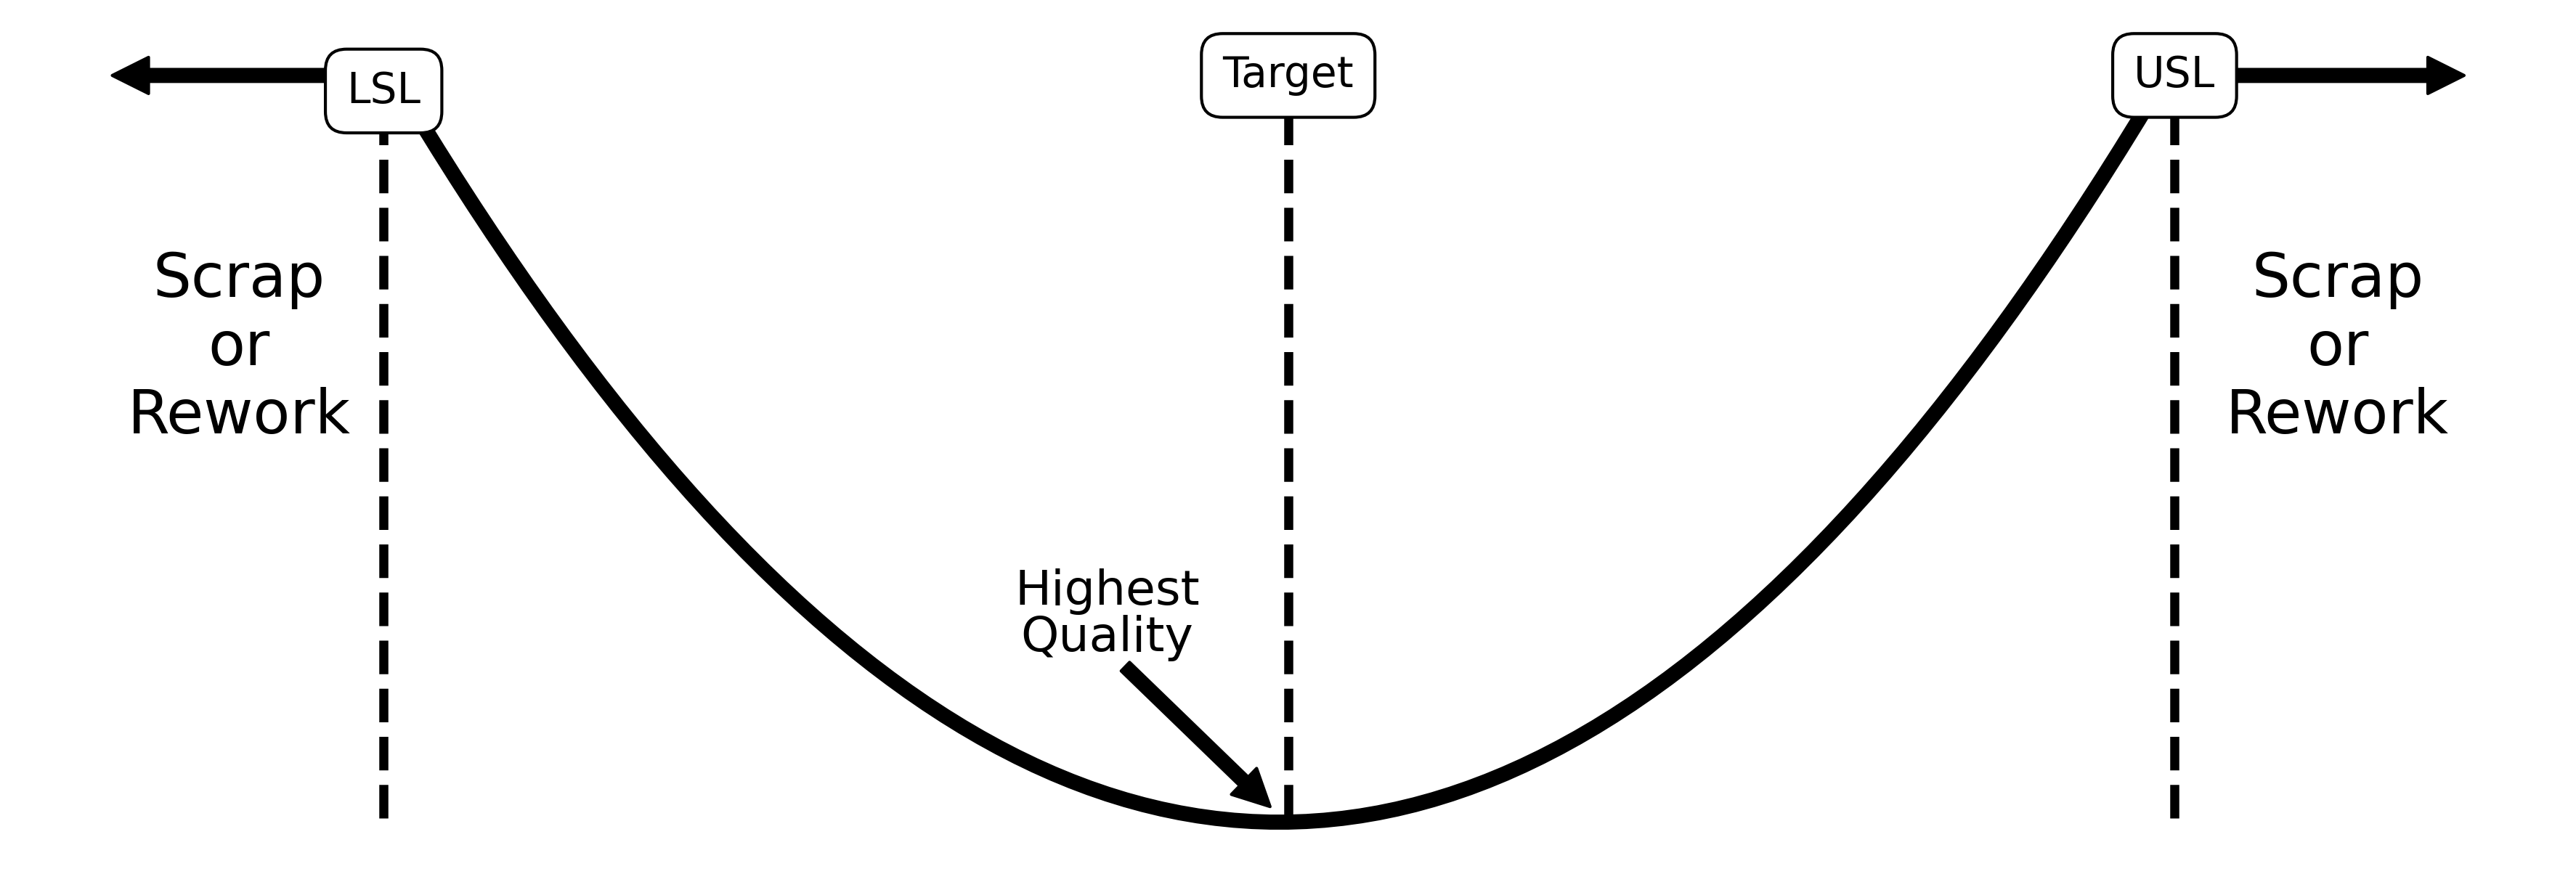

In [5]:
# Specify parabola
x = np.linspace(-0.7, 0.7, 100)
y = x**2

# Create figure and axis
fig, ax = plt.subplots(figsize=(15, 5), dpi=300)

# Plot parabola
ax.plot(y, ls='-', lw=5, color='black')

# Specification limits (LSL, Target, USL)
spec_limits = [0, 50, 99]
ymax_values = [0.95, 0.90, 0.95]  # Different ymax for each line

for x_val, ymax in zip(spec_limits, ymax_values):
    ax.axvline(x_val, ls='--', lw=3, color='black', ymin=0.05, ymax=ymax)

# Outside limit horizontal arrows
arrow_positions = [(-15, 0.48, 0, 0.48), (115, 0.48, 100, 0.48)]
for x_start, y_start, x_end, y_end in arrow_positions:
    ax.annotate('', xy=(x_start, y_start), xytext=(x_end, y_end),
                arrowprops=dict(edgecolor='black', facecolor='black'))

# Text labels for LSL, USL, and Target
labels = {0: "LSL", 99: "USL", 50: "Target"}

for x_val, label in labels.items():
    ax.text(x_val, 0.48 if x_val else 0.47, label, ha='center', va='center', fontsize=14,
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=0.5))

# Scrap & Rework labels
ax.text(-8, 0.25, 'Scrap\nor\nRework', ha='center', fontsize=20)
ax.text(108, 0.25, 'Scrap\nor\nRework', ha='center', fontsize=20)

# Quality label
ax.text(40, 0.14, 'Highest', ha='center', fontsize=16)
ax.text(40, 0.11, 'Quality', ha='center', fontsize=16)

# Arrow pointing towards "Highest Quality"
ax.annotate('', xy=(49, 0.01), xytext=(41, 0.1),
            arrowprops=dict(edgecolor='black', facecolor='black'))

# Remove axis visibility
ax.set_axis_off()

# Set x-axis limits
ax.set_xlim([-20, 120])

# Modify spine visibility and transparency
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

for spine in ['bottom', 'left']:
    ax.spines[spine].set_alpha(0.6)

# Show plot
plt.show()

## Figure 10.7: A process influenced by only common causes

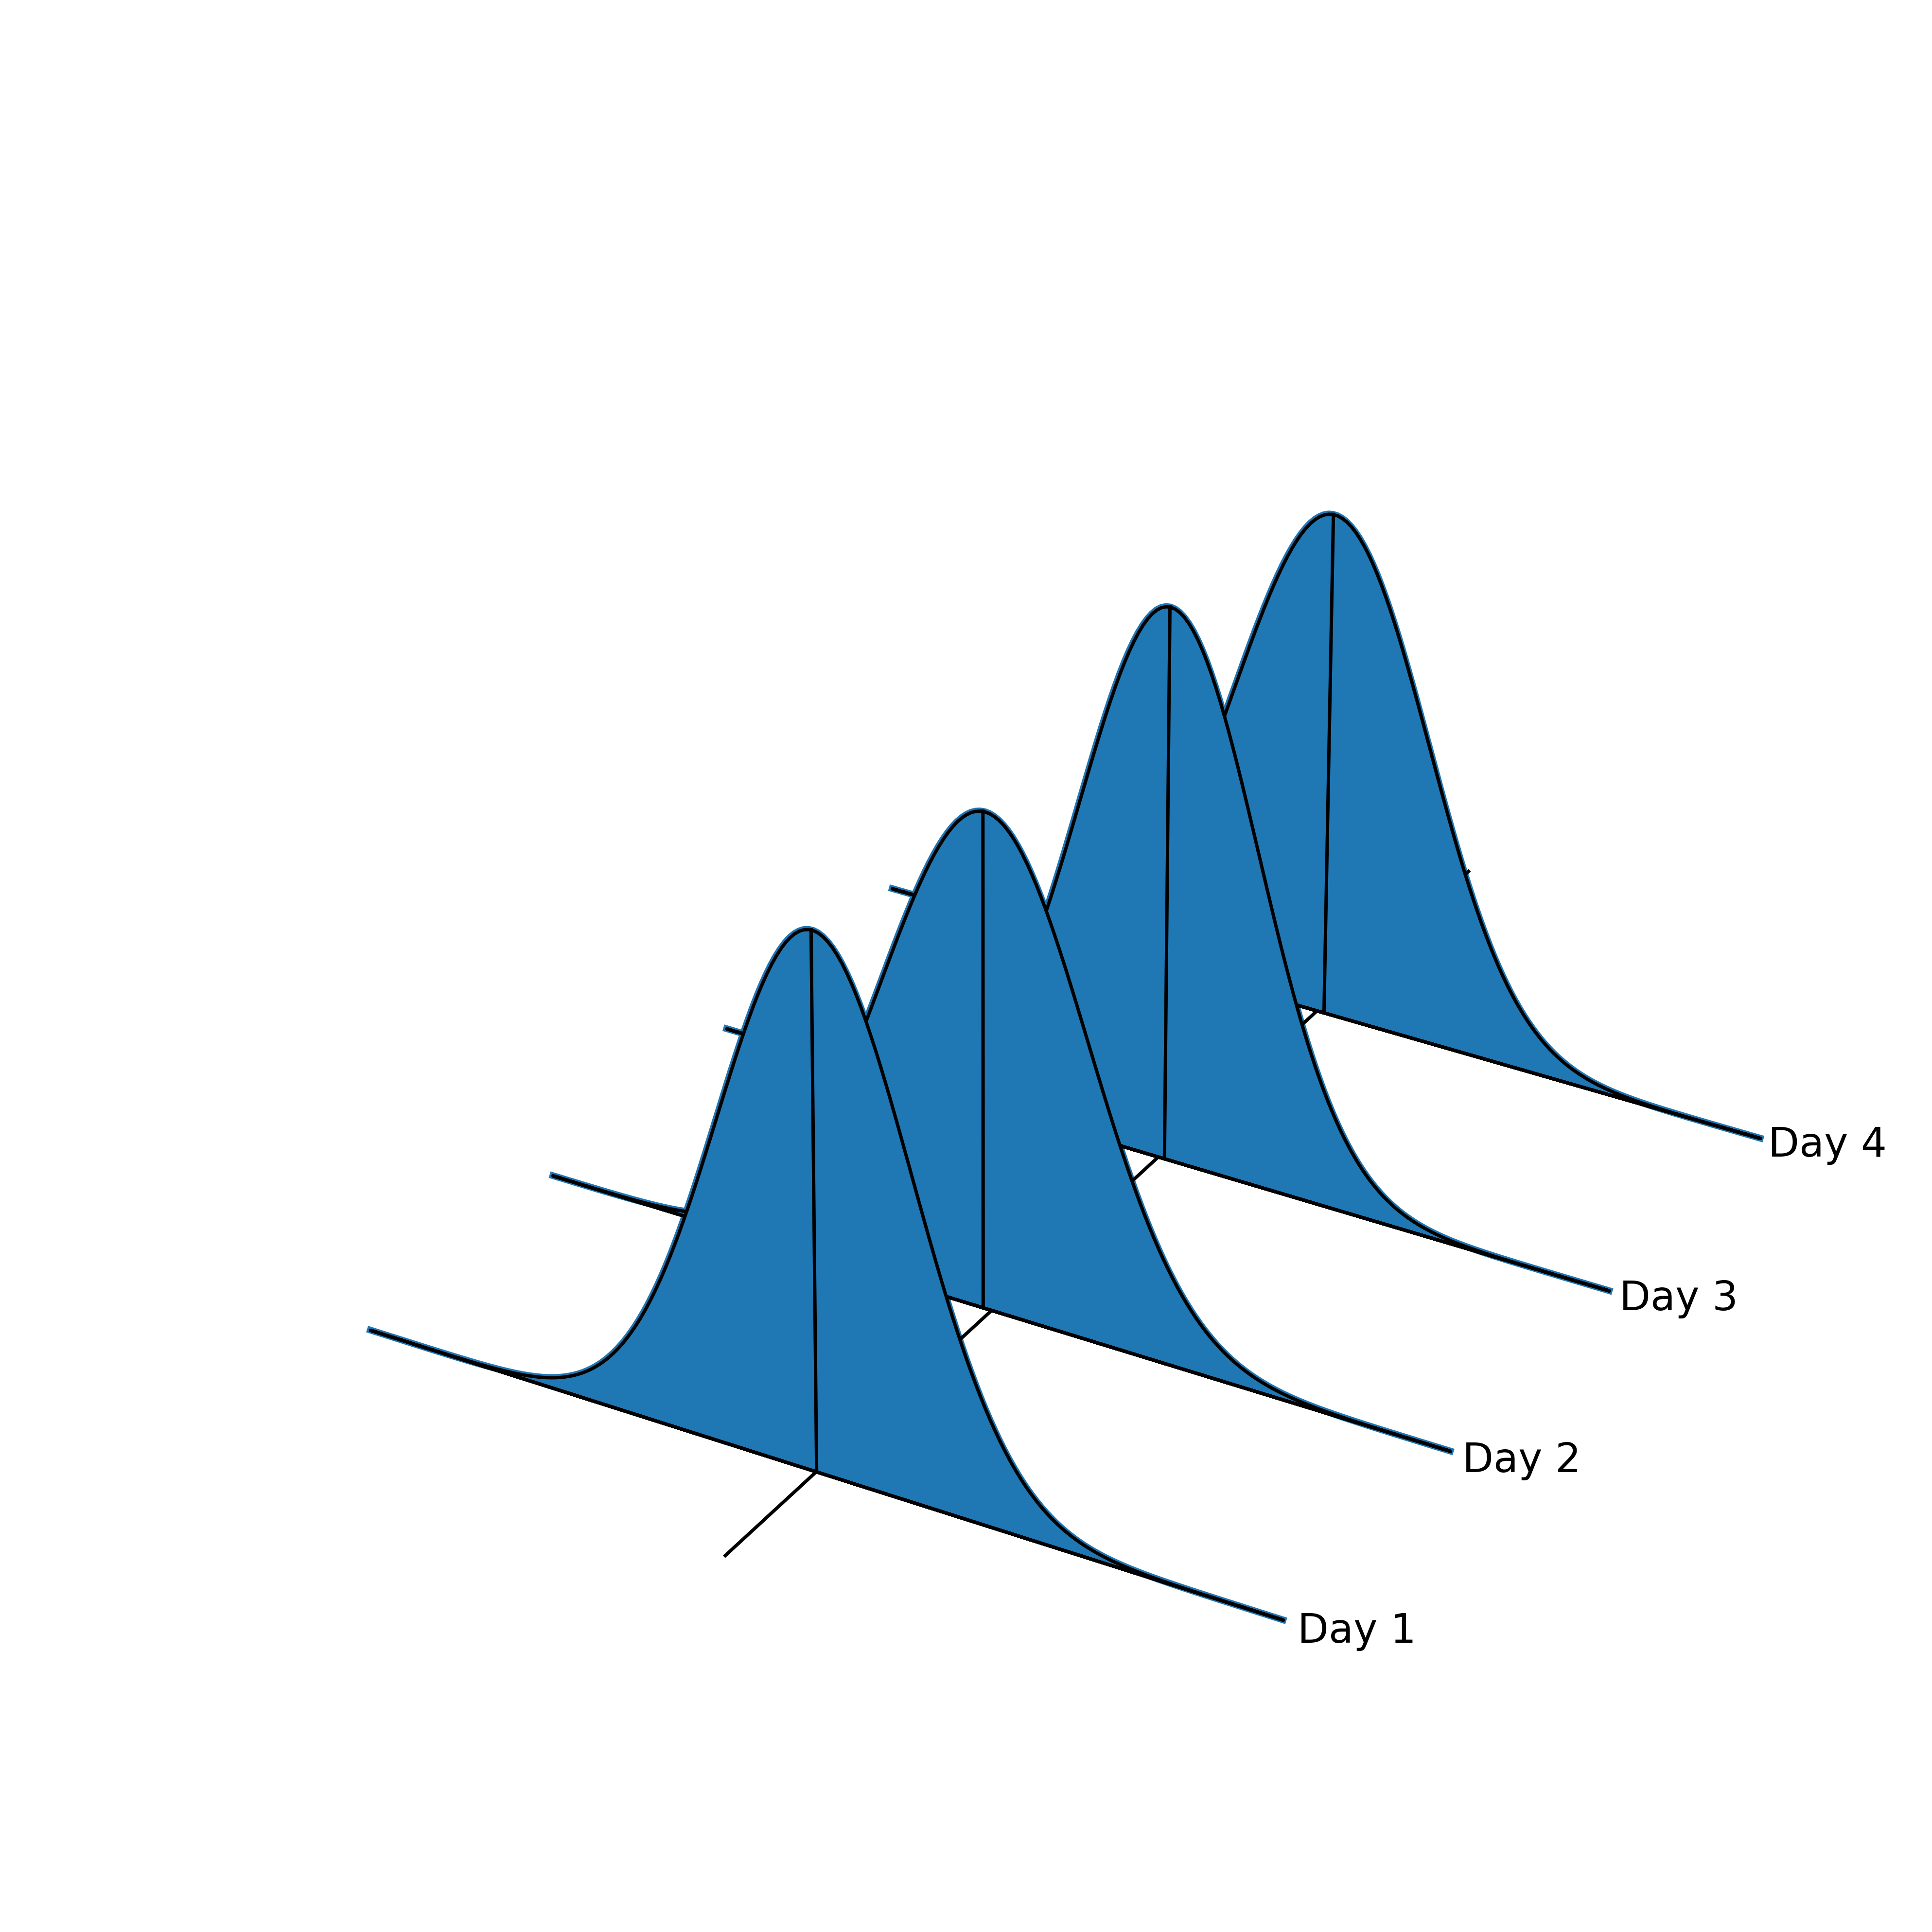

In [6]:
# Seed for repeatability
np.random.seed(43)

# Example data for D1, D2, D3, and D4
C1 = np.random.normal(10, 1.5, 1000)
C2 = np.random.normal(9.75, 1.6, 1000)
C3 = np.random.normal(10.1, 1.4, 1000)
C4 = np.random.normal(10.2, 1.5, 1000)

data_list = [C1, C2, C3, C4]
specific_ticks = ['Day 1', 'Day 2', 'Day 3', 'Day 4']

# Initialize the figure
fig = plt.figure(figsize=(10, 12), dpi=500)
ax = fig.add_subplot(111, projection='3d')

# Increase spacing between datasets
spacing = 0.05
x_min, x_max = 0, 20  # Set the range for the x-axis

# Generate KDE for each dataset
for i, data in enumerate(data_list):
    kde = gaussian_kde(data, bw_method=1)  # KDE with 'scott' bandwidth
    x_vals = np.linspace(x_min, x_max, 200)  # Fine grid for smooth KDE
    y_vals = kde(x_vals)  # KDE density values

    # Find the maximum value and corresponding x-value
    max_density = np.max(y_vals)
    max_x = x_vals[np.argmax(y_vals)]
    
    # Offset each dataset on the y-axis
    zs_value = i * spacing if i > 0 else 0  # Offset for each dataset

    # Plot the KDE line
    ax.plot(x_vals, [zs_value] * len(x_vals), y_vals, color='tab:blue', lw=2)

    # Create a filled polygon under the KDE curve
    verts = [(x, zs_value, 0) for x in x_vals] + [(x, zs_value, y) for x, y in zip(x_vals, y_vals)]
    verts += [(x_vals[-1], zs_value, 0), (x_vals[0], zs_value, 0)]  # Close the polygon

    poly = Poly3DCollection([verts], color='tab:blue', alpha=1, edgecolor='black')
    ax.add_collection3d(poly)
    
    # Add a vertical line at the mean of each dataset
    mean_value = np.mean(data)
    max_density = np.max(y_vals)  # Top of the KDE
    ax.plot(
        [mean_value, mean_value],  # x-coordinates
        [zs_value, zs_value],  # y-coordinates
        [0, max_density],  # z-coordinates
        color='black', lw=1, zorder=10  # Ensure higher zorder
    )

    # Add the day label for each dataset
    ax.text(
        22.75,  # Slightly left of the x-axis
        zs_value,  # y-coordinate (offset by spacing)
        0.011,  # z-coordinate
        specific_ticks[i],  # Label text
        color='black',
        fontsize=12,
        ha='right',  # Align text to the right
        va='center'  # Vertically center the text
    )

# Add a time axis line
ax.plot(
    [10, 10],  # x coordinates for the line
    [-0.025, 0.2],  # y coordinates (T1 to T4)
    [0, 0],  # z coordinates (always at 0)
    color='black', linewidth=1
)

# Adjust y-ticks and labels
y_positions = [i * spacing for i in range(len(specific_ticks))]
ax.set_yticks(y_positions)
ax.set_yticklabels(specific_ticks)

# Extend y-axis limits
ax.set_ylim(-spacing, len(specific_ticks) * spacing)

# Remove grid
ax.grid(False)

# Scale y-axis to make it rectangular
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1.0, 1.50, .75, 1.0]))

# Hide the axes for a cleaner look
ax.set_axis_off()

# Show the plot
plt.show()

## Figure 10.8: A process influenced by both common and assignable causes

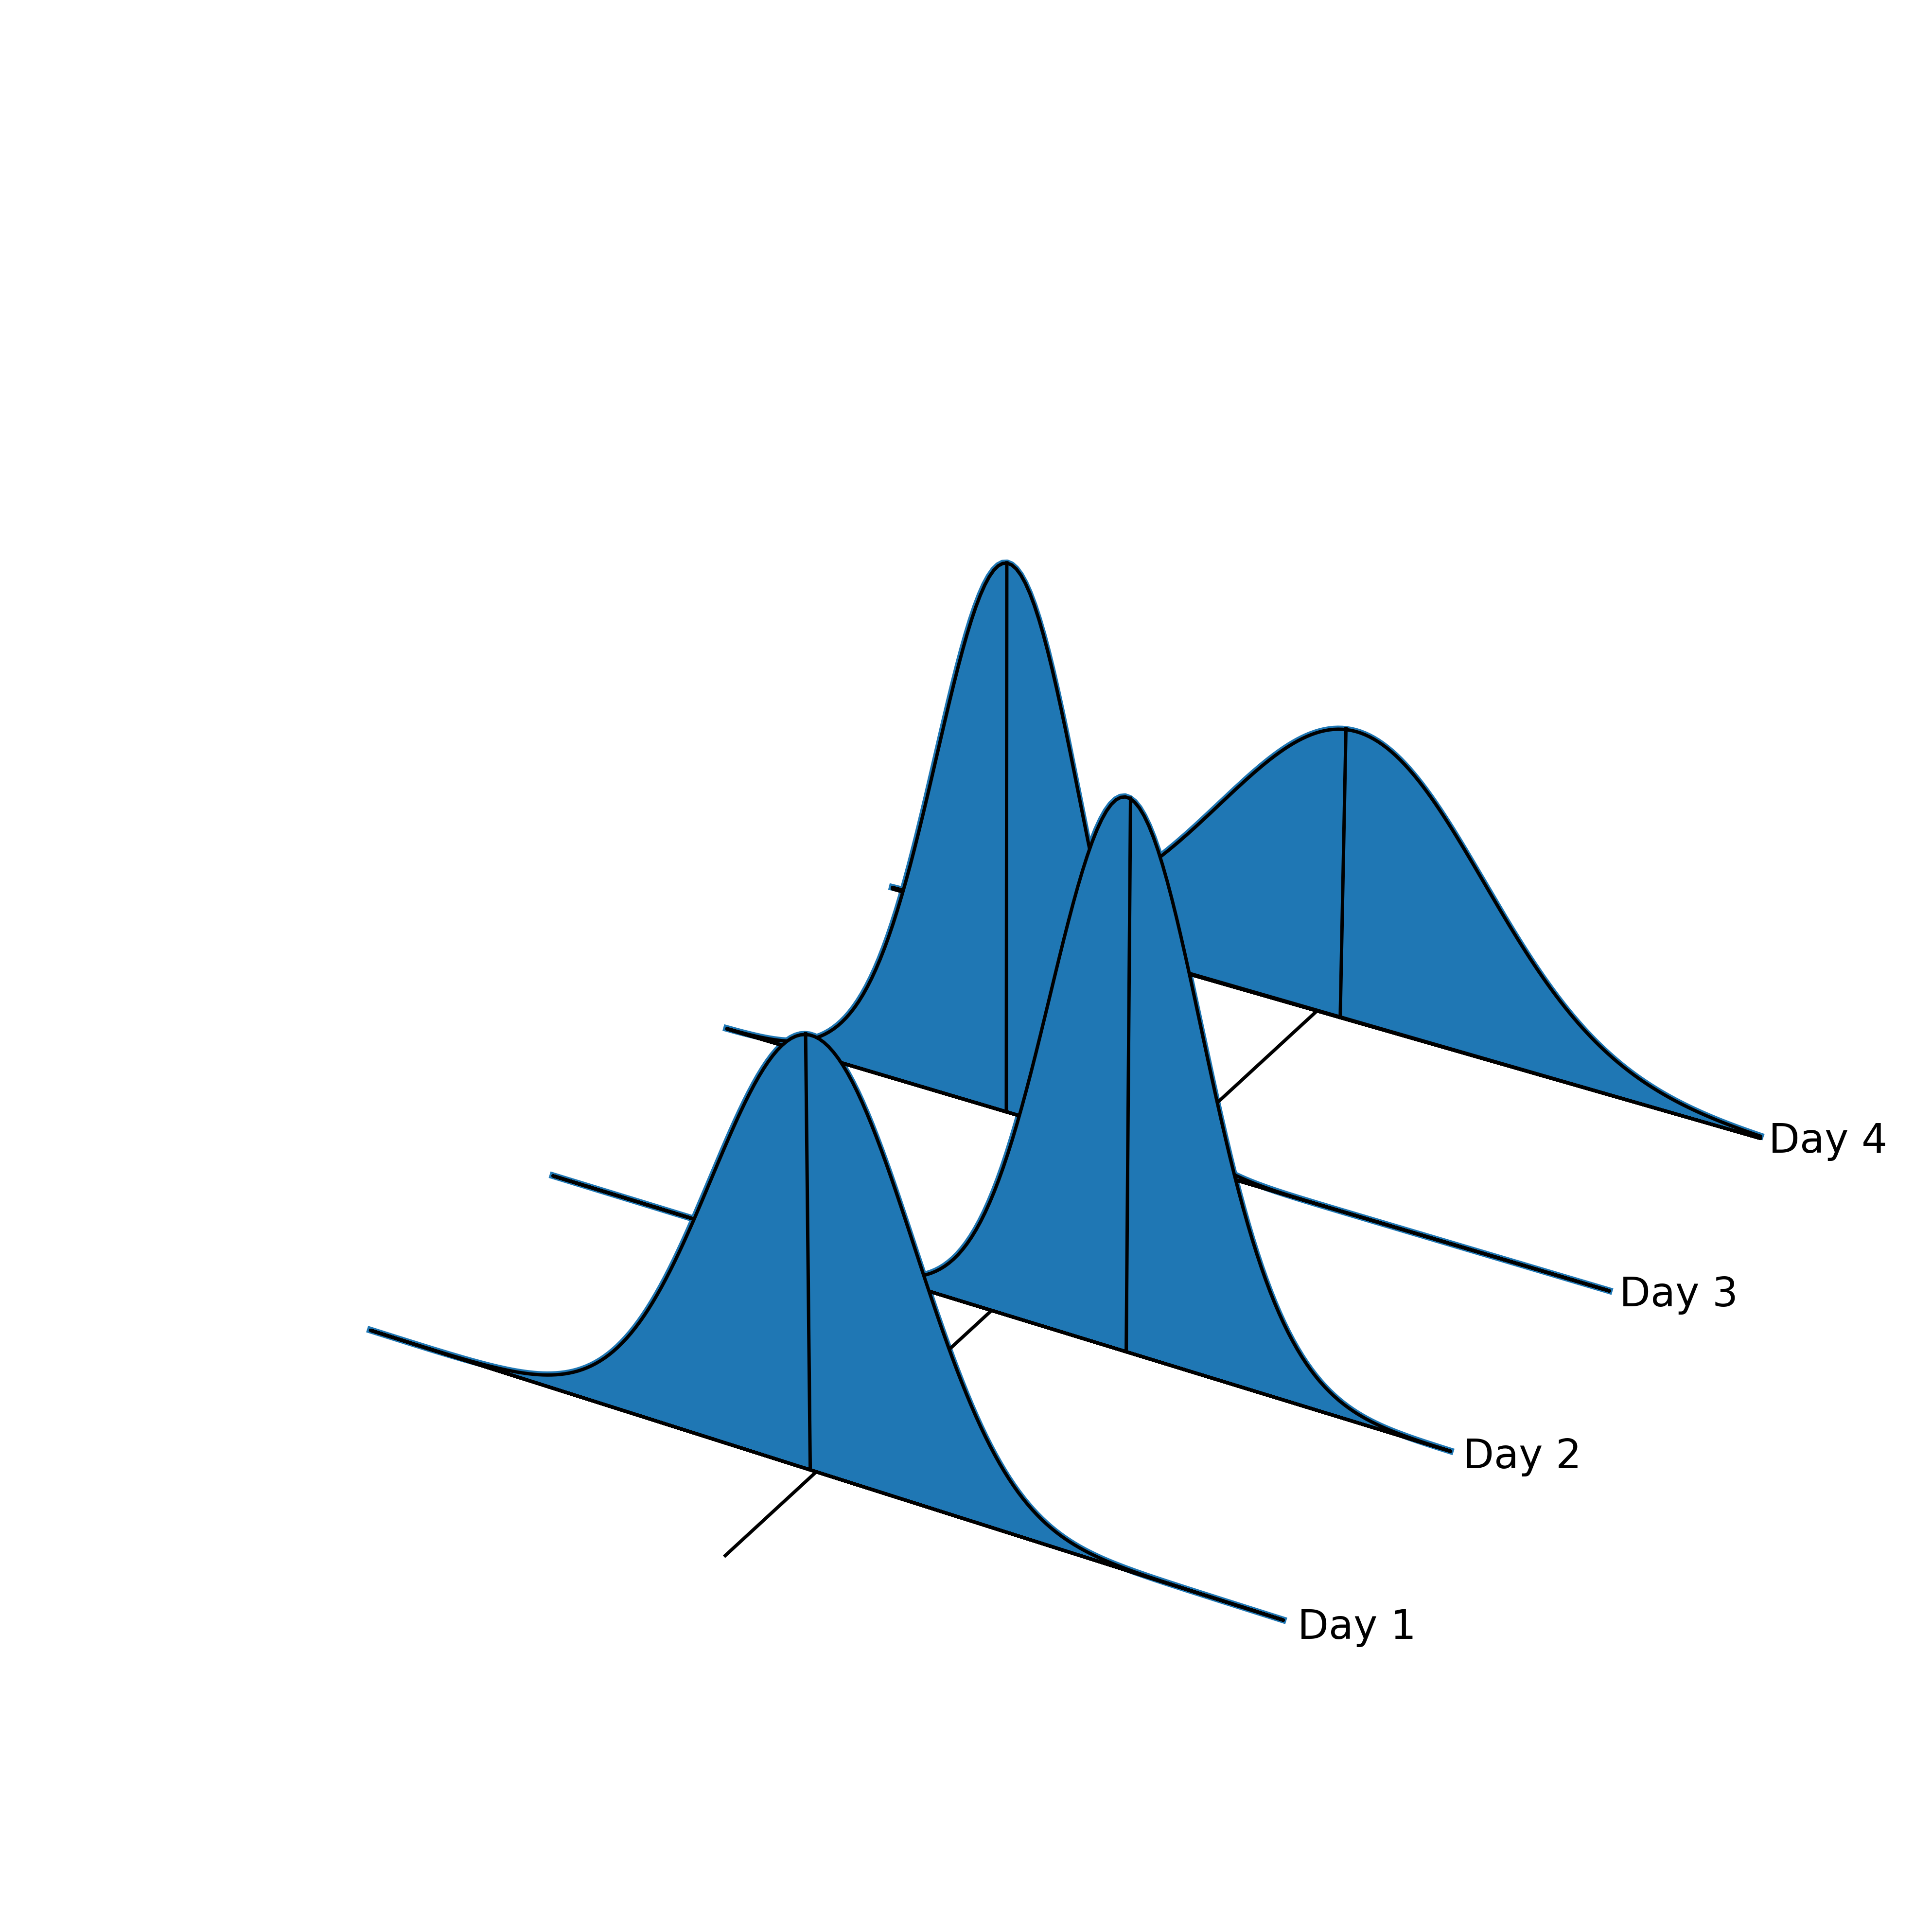

In [7]:
# Seed for repeatability
np.random.seed(44)

# Example assignable cause data for A1, A2, A3, and A4
A1 = np.random.normal(10, 1.5, 100)
A2 = np.random.normal(13, 1.1, 100)
A3 = np.random.normal(6.6, 1.25, 100)
A4 = np.random.normal(10, 2.25, 100)

data_list = [A1, A2, A3, A4]
specific_ticks = ['Day 1', 'Day 2', 'Day 3', 'Day 4']

# Initialize the figure
fig = plt.figure(figsize=(10, 12), dpi=500)
ax = fig.add_subplot(111, projection='3d')

# Increase spacing between datasets
spacing = 0.05
x_min, x_max = 0, 20  # Set the range for the x-axis

# Generate KDE for each dataset
for i, data in enumerate(data_list):
    kde = gaussian_kde(data, bw_method=1)  # KDE with 'scott' bandwidth
    x_vals = np.linspace(x_min, x_max, 200)  # Fine grid for smooth KDE
    y_vals = kde(x_vals)  # KDE density values

    # Find the maximum value and corresponding x-value
    max_density = np.max(y_vals)
    max_x = x_vals[np.argmax(y_vals)]
    
    # Offset each dataset on the y-axis
    zs_value = i * spacing if i > 0 else 0  # Offset for each dataset

    # Plot the KDE line
    ax.plot(x_vals, [zs_value] * len(x_vals), y_vals, color='tab:blue', lw=2)

    # Create a filled polygon under the KDE curve
    verts = [(x, zs_value, 0) for x in x_vals] + [(x, zs_value, y) for x, y in zip(x_vals, y_vals)]
    verts += [(x_vals[-1], zs_value, 0), (x_vals[0], zs_value, 0)]  # Close the polygon

    poly = Poly3DCollection([verts], color='tab:blue', alpha=1, edgecolor='black')
    ax.add_collection3d(poly)
    
    # Add a vertical line at the mean of each dataset
    mean_value = np.mean(data)
    max_density = np.max(y_vals)  # Top of the KDE
    ax.plot(
        [mean_value, mean_value],  # x-coordinates
        [zs_value, zs_value],  # y-coordinates
        [0, max_density],  # z-coordinates
        color='black', lw=1, zorder=10  # Ensure higher zorder
    )

    # Add the day label for each dataset
    ax.text(
        22.75,  # Slightly left of the x-axis
        zs_value,  # y-coordinate (offset by spacing)
        0.015,  # z-coordinate
        specific_ticks[i],  # Label text
        color='black',
        fontsize=12,
        ha='right',  # Align text to the right
        va='center'  # Vertically center the text
    )

# Add a time axis line
ax.plot(
    [10, 10],  # x coordinates for the line
    [-0.025, 0.2],  # y coordinates (T1 to T4)
    [0, 0],  # z coordinates (always at 0)
    color='black', linewidth=1
)

# Adjust y-ticks and labels
y_positions = [i * spacing for i in range(len(specific_ticks))]
ax.set_yticks(y_positions)
ax.set_yticklabels(specific_ticks)

# Extend y-axis limits
ax.set_ylim(-spacing, len(specific_ticks) * spacing)

# Remove grid
ax.grid(False)

# Scale y-axis to make it rectangular
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1.0, 1.50, .75, 1.0]))

# Hide the axes for a cleaner look
ax.set_axis_off()

# Show the plot
plt.show()

## Figure 10.9: XmR chart of electrical resistance measurements

In [8]:
# Specify round value
round_value = 1

# Calculate mean of resistance measurements
mean = round(initial_df['Resistance'].mean(),round_value)

# Calculate average moving range
average_mR = round(initial_df['Moving Range'].mean(),round_value)

# Set values for the numeric constants C1 and C2
E2 = 2.660
D4 = 3.268

# Calculate the Upper Range Limit
UPL = round(mean + (E2*average_mR),round_value)
# Calculate the Lower Process Limit
LPL = round(max(0, mean - (E2*average_mR)),round_value) # Note the max condition 
# Calculate the Upper Range Limit
URL = round(D4*average_mR,round_value)

In [9]:
data = initial_df['Resistance']

moving_ranges = initial_df['Moving Range'].copy()
moving_ranges.iloc[0] = np.nan

# Define line parameters
xchart_lines = [(mean, 'black'), (UPL, 'red'), (LPL, 'red')]
mrchart_lines = [(average_mR, 'black'), (URL, 'red')]

# Mask values outside limits
upper_lim = np.ma.masked_where(data < UPL, data)
lower_lim = np.ma.masked_where(data > LPL, data)
url_greater = np.ma.masked_where(moving_ranges <= URL, moving_ranges)

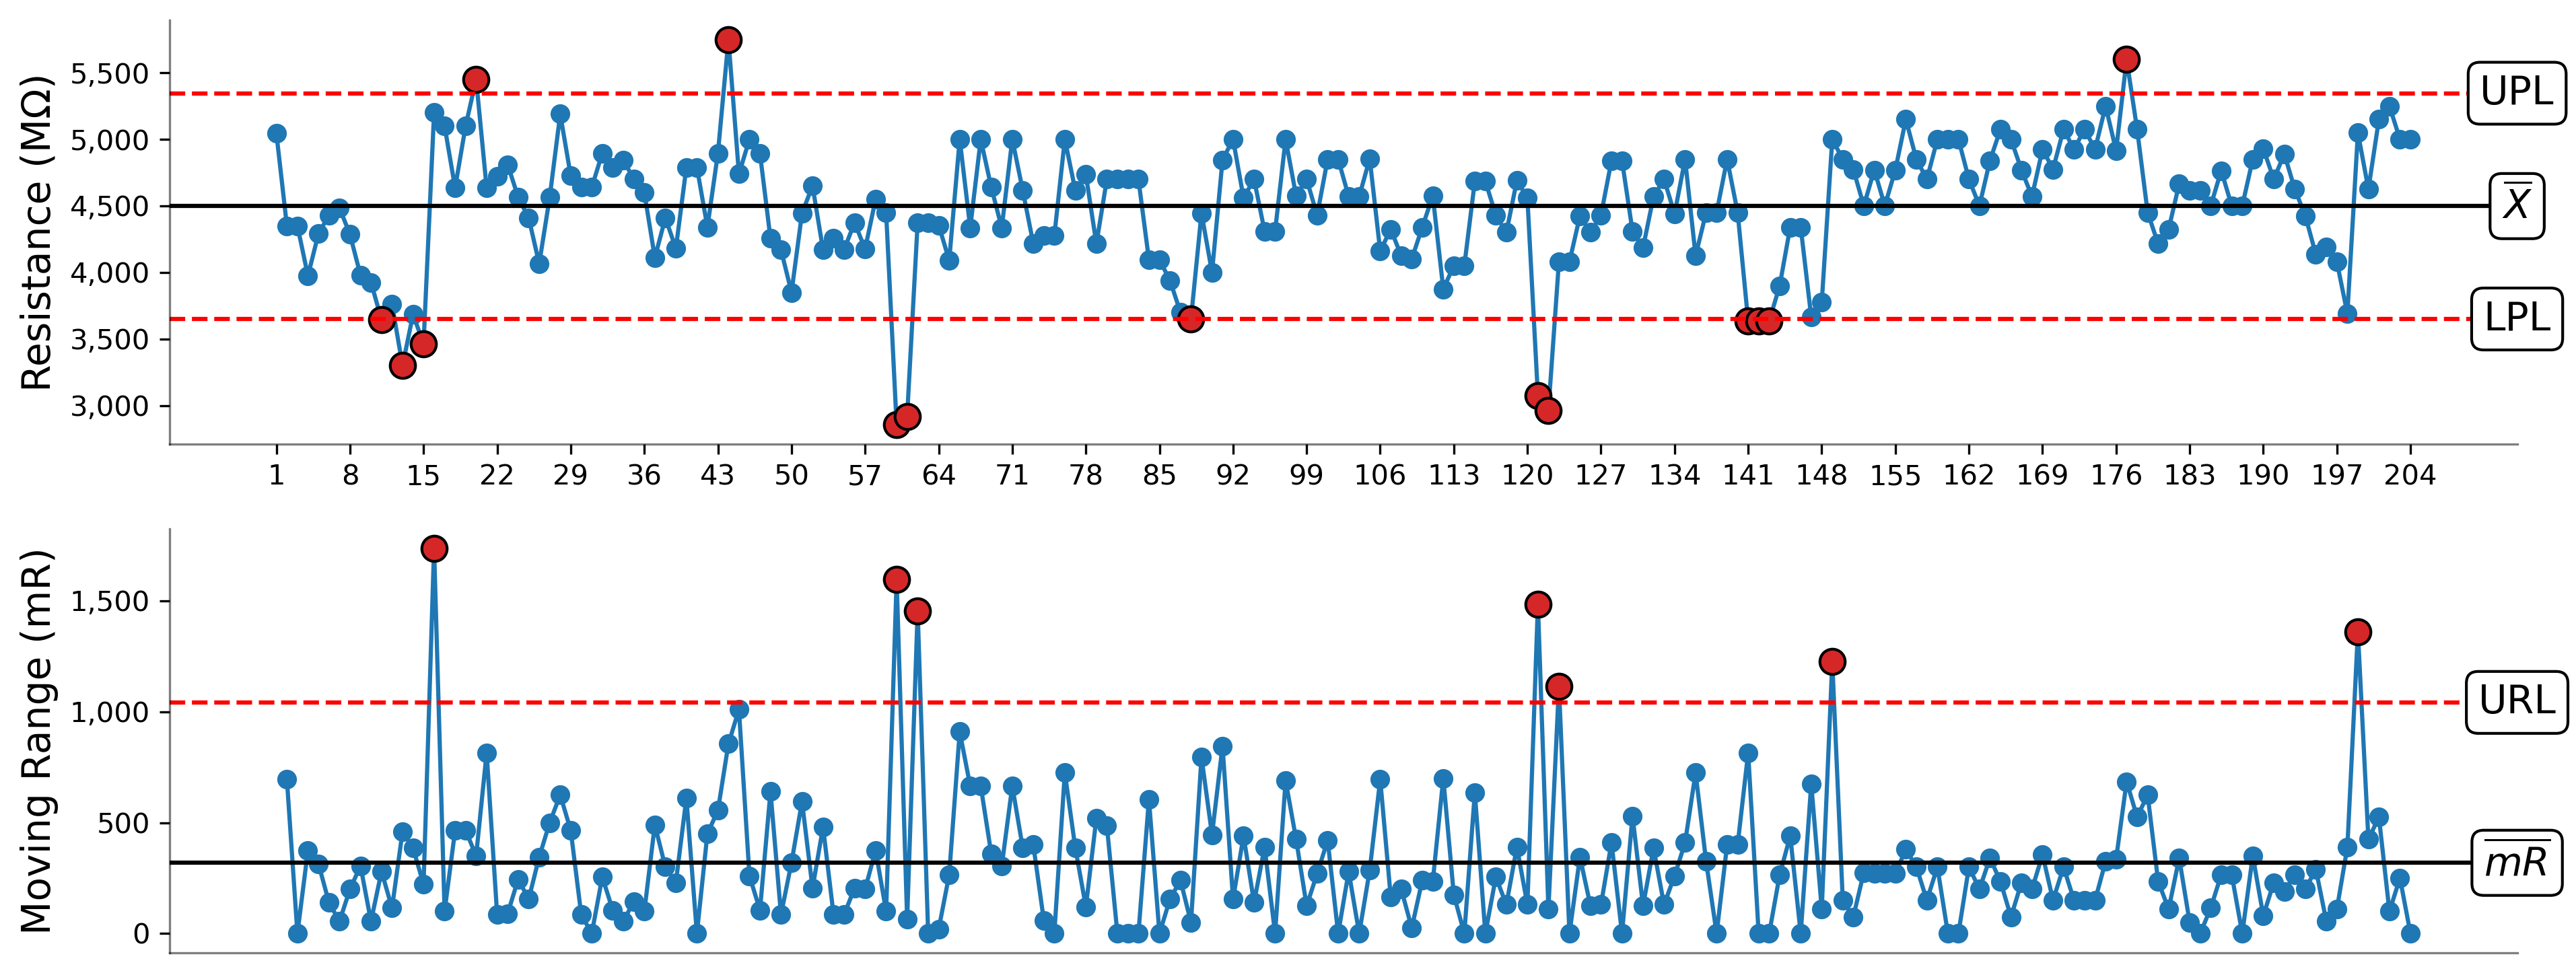

In [10]:
# Extract Data
data = initial_df['Resistance']
labels = initial_df['Value']

moving_ranges = initial_df['Moving Range'].copy()
moving_ranges.iloc[0] = np.nan

# Define Process Limits
xchart_lines = [(mean, '-', 'black'), (UPL, '--', 'red'), (LPL, '--', 'red')]
mrchart_lines = [(average_mR, '-', 'black'), (URL, '--', 'red')]

# Mask values outside limits
upper_lim = np.ma.masked_where(data < UPL, data)
lower_lim = np.ma.masked_where(data > LPL, data)
url_greater = np.ma.masked_where(moving_ranges <= URL, moving_ranges)

# Setup Figure
fig, axs = plt.subplots(figsize=(15, 6), 
                        nrows=2, 
                        ncols=1, 
                        dpi=300)

# X-Chart (Individuals Chart)
axs[0].plot(labels, data, marker='o', label="Data")
axs[0].plot(labels, lower_lim, marker='o', ls='none', color='tab:red', markeredgecolor='black', markersize=9)
axs[0].plot(labels, upper_lim, marker='o', ls='none', color='tab:red', markeredgecolor='black', markersize=9)

# Add Process Limits
for value, linetype, color in xchart_lines:
    axs[0].axhline(value, ls=linetype, c=color)

# Add Labels for Process Limits
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1)
for value, label in [(UPL, 'UPL'), (LPL, 'LPL'), (mean, r'$\overline{X}$')]:
    axs[0].text(axs[0].get_xlim()[1] * 1.0, value, label, #round(value, round_value),
                color='black', ha='center', va='center', 
                fontsize=14, bbox=bbox_props)

# X-Axis Formatting
tick_interval = 7
tick_positions = np.arange(0, len(labels), tick_interval)
axs[0].set_xticks(tick_positions)
axs[0].set_xticklabels(labels.iloc[tick_positions], rotation=0, ha='center')

# Moving Range Chart (mR Chart)
axs[1].plot(labels, moving_ranges, marker='o', label="Moving Range")
axs[1].plot(labels, url_greater, marker='o', ls='none', color='tab:red', markeredgecolor='black', markersize=9)

# Offset moving range by 1 relative to the individual values
for xi, yi in zip(labels, moving_ranges):
    if np.isnan(yi):
        plt.plot(xi, 0, marker='x', color='white', markersize=0)

# Add average moving range and URL for mR chart
for value, linetype, color in mrchart_lines:
    axs[1].axhline(value, ls=linetype, c=color)

# Add Labels for mR chart limit and average moving range
for value, label in [(URL, 'URL'), (average_mR, r'$\overline{mR}$')]:
    axs[1].text(axs[1].get_xlim()[1], value, label, #round(value, round_value),
                color='black', ha='center', va='center', 
                fontsize=14, bbox=bbox_props)

# Titles and Labels
axs[0].set_ylabel("Resistance (MΩ)", fontsize=14)
axs[0].set_xlabel("")
axs[0].set_title("")

# Remove xticks on moving range chart
axs[1].set_xticks([])
axs[1].set_ylabel("Moving Range (mR)", fontsize=14)

# Remove spines
sns.despine()
# Set alpha values
for val in range(0,2):
    axs[val].spines[['left','bottom']].set_alpha(0.5)

# Add arrow annotation to highlight May-1847
axs[0].annotate('Hand washing begins\nmid-May 1847', 
             xy=(76.2,12.5), 
             xytext=(89,21), 
             color='black', 
             fontsize=14,
             ha='center',
             arrowprops=dict(facecolor='black'),
             bbox=dict(facecolor='white',boxstyle='round',edgecolor='black'))

for val in range(0,2):
    axs[val].yaxis.set_major_formatter(FuncFormatter(
        lambda y, _: f'{int(y):,}' if y >= 1000 else f'{int(y)}'
    ))

# Show Plot
plt.show()

## Figure 10.10: XmR chart of initial and additional resistance measurements

In [11]:
# Create list of dublin dataframes
df_list = [initial_df, additional_df]
# Create list of dublin labels
plot_label_list = ['Before causes of variability were eliminated', 'After causes of variability were eliminated']

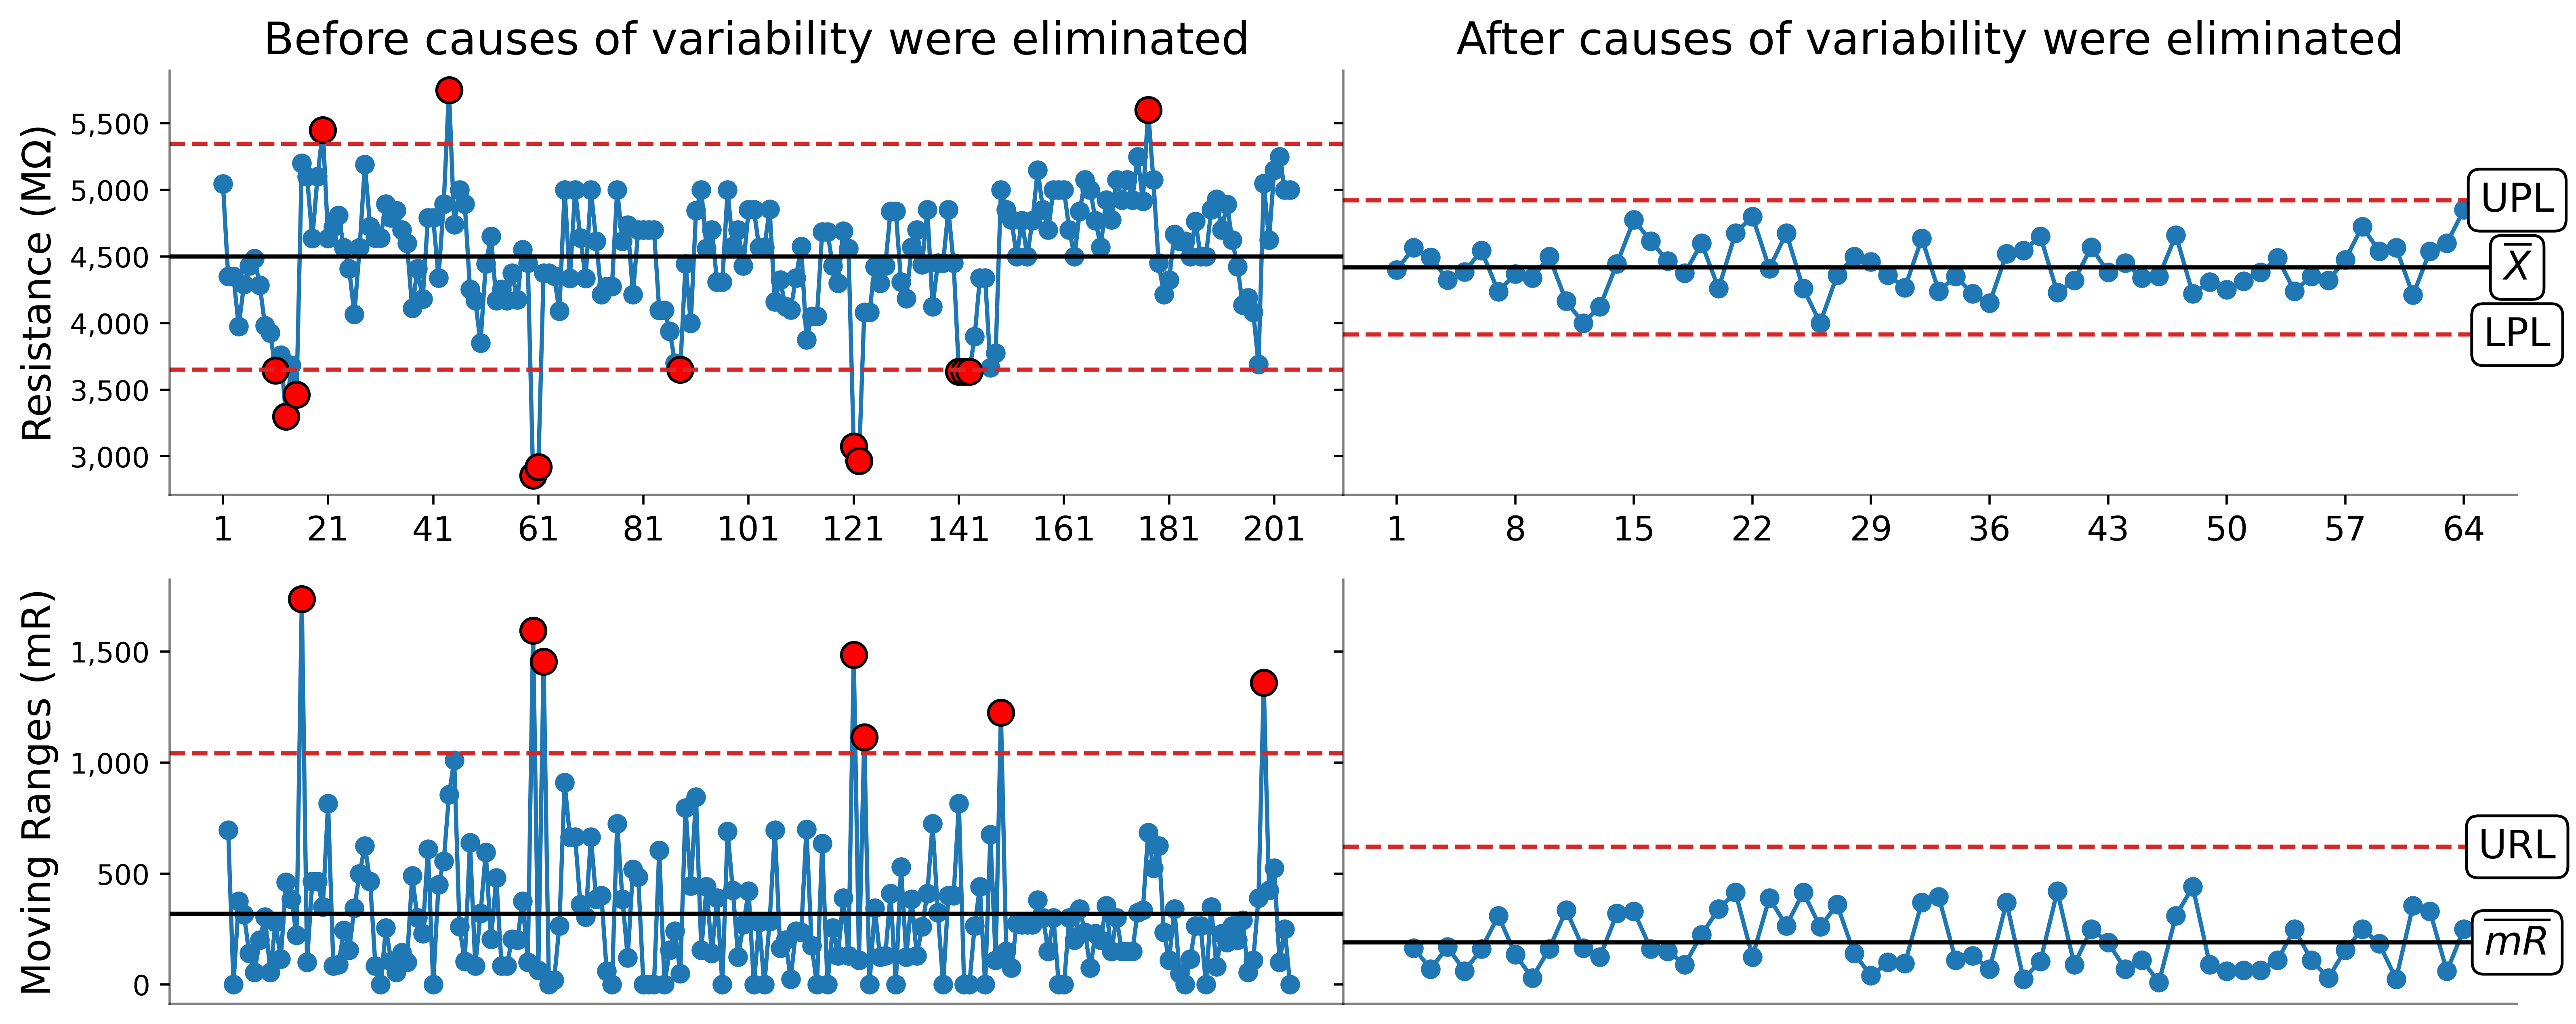

In [12]:
# Specify round_value and tickinterval
round_value = 1

tick_interval_1 = 20
tick_interval_2 = 7

# Specify condition
condition = 'Resistance'
labels = 'Value'

# Define plotting parameters
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 6), dpi=500, sharey='row')
plt.subplots_adjust(wspace=0)

# Initialize an empty list to store stats for each dataframe
stats_list = []

# Loop through the df_list and plot on the axes
for idx, (df, label) in enumerate(zip(df_list, plot_label_list)):

    data = df[condition]
    moving_range = round(abs(data.diff()), round_value).copy()
    moving_range.iloc[0] = np.nan
    xticks = df[labels]

    # Specify scaling factors
    E2 = 2.660
    D4 = 3.268

    # Calculate statistics for UPL and LPL
    mean = round(data.mean(), round_value)
    average_mR = round(moving_range.mean(), round_value)
    UPL = round(mean + (E2 * average_mR), round_value)
    LPL = round(max(mean - (E2 * average_mR), 0), round_value)
    URL = round(D4 * average_mR, round_value)

    # Characterize process
    if ((data < LPL) | (data > UPL)).any():
        characterization = "Unpredictable"
    elif (moving_range > URL).any():  # Add condition for moving range exceeding the URL
        characterization = "Unpredictable"
    else:
        characterization = "Predictable"

    # Store statistics in the list
    stats_list.append({
        'Label': label,
        'Mean': mean,
        'Ave. mR': average_mR,
        'UPL': UPL,
        'LPL': LPL,
        'URL': URL,
        'PLR': UPL-LPL,
        'Characterization': characterization
    })

    # Plot individual values in the first two subplots (top row)
    axes[0, idx].plot(data, marker='o')
    # Masking and plotting limits
    axes[0, idx].plot(np.ma.masked_where(data < UPL, data), marker='o', ls='none', color='red', markeredgecolor='black', markersize=9)
    axes[0, idx].plot(np.ma.masked_where(data > LPL, data), marker='o', ls='none', color='red', markeredgecolor='black', markersize=9)
    axes[0, idx].set_title(label, fontsize=16)

    # Add UPL and LPL horizontal lines for individual values plot
    axes[0, idx].axhline(UPL, color='tab:red', linestyle='--')
    axes[0, idx].axhline(LPL, color='tab:red', linestyle='--')
    axes[0, idx].axhline(mean, color='black', linestyle='-')
    
    # Choose tick interval for each subplot
    if idx == 0:
        tickinterval = tick_interval_1    # denser ticks for plots 1 and 2
    else:
        tickinterval = tick_interval_2 
    
    # Set x-tick labels with separate intervals
    tick_positions = np.arange(0, len(xticks), tickinterval)
        
    axes[0, idx].set_xticks(tick_positions)
    axes[0, idx].set_xticklabels(xticks.iloc[tick_positions], rotation=0, ha='center', fontsize=12)

    # Plot moving range in the second row
    axes[1, idx].plot(moving_range, marker='o')
    
    # Offset moving range by 1 relative to the individual values
    for xi, yi in zip(labels, moving_range):
        if np.isnan(yi):
            axes[1, idx].plot(xi, 0, marker='x', color='white', markersize=0)

    # Add UPL and LPL horizontal lines for moving range plot
    axes[1, idx].axhline(URL, color='tab:red', linestyle='--')
    axes[1, idx].axhline(average_mR, color='black', linestyle='-')
    axes[1, idx].plot(np.ma.masked_where(moving_range < URL, moving_range), marker='o', ls='none', color='red', markeredgecolor='black', markersize=9)

    # Add label to y-axes
    axes[0, 0].set_ylabel('Resistance (MΩ)', fontsize=14)
    axes[1, 0].set_ylabel('Moving Ranges (mR)', fontsize=14)
    
    # Establish bbox properties
    bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1)

    # Add labels to 2nd and 4th plots
    if idx == 1:
        axes[0, idx].text(axes[0, idx].get_xlim()[1], UPL, 'UPL', color='black', ha='center', va='center',
                          fontsize=14, bbox=bbox_props)
        axes[0, idx].text(axes[0, idx].get_xlim()[1], LPL, 'LPL', color='black', ha='center', va='center', 
                          fontsize=14, bbox=bbox_props)
        axes[0, idx].text(axes[0, idx].get_xlim()[1], mean, r'$\overline{X}$', color='black', ha='center', va='center',
                          fontsize=14, bbox=bbox_props)

    if idx == 1:
        axes[1, idx].text(axes[1, idx].get_xlim()[1], URL, 'URL', color='black', ha='center', va='center', 
                          fontsize=14, bbox=bbox_props)
        axes[1, idx].text(axes[1, idx].get_xlim()[1], average_mR, r'$\overline{mR}$', 
                          color='black', ha='center', va='center', 
                          fontsize=14, bbox=bbox_props)

    # Remove ticks on xticks for moving ranges
    axes[1, idx].set_xticks([])
    
    # Loop through the axes and set spine alpha
    for ax_row in axes:
        for ax in ax_row:
            for spine in ax.spines.values():
                spine.set_alpha(0.5)
    
    formatter = FuncFormatter(lambda y, _: f'{int(y):,}' if y >= 1000 else f'{int(y)}')

    # Apply to all axes individually
    for row in axes:
        for ax in row:
            ax.yaxis.set_major_formatter(formatter)

# Stylize plots
sns.despine()
    
# Convert stats list into DataFrame
stats_df = pd.DataFrame(stats_list)